**1 - Importando as bibliotecas**

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

**2 - Carregando os Dados**

In [20]:
df = pd.read_excel('c:/Users/Utilizador/anaconda3/envs/Turnover/Base_RH.xlsx', sheet_name='base_tratada')

In [21]:
df.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extra?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Raramente,1,E. Técnico,Médio,Feminino,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Frequentemente,8,E. Médio,Alto,Masculino,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Raramente,2,E. Técnico,Muito Alto,Masculino,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Frequentemente,3,Mestrado,Muito Alto,Feminino,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Raramente,2,E. Médio,Baixo,Masculino,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2


**2.1 - Realizando ajustes na base de dados.**

**OBS:** A coluna ID pode ser tratada para representar o próprio índice, pois há uma duplicidade de números que não ajuda na visualização. <br>Assim teremos:

In [22]:
df = pd.read_excel('c:/Users/Utilizador/anaconda3/envs/Turnover/Base_RH.xlsx', sheet_name='base_tratada', index_col="ID")
df.index.name = None # Removendo o nome do índice (nome da coluna de índice)
df.columns.name = 'ID' # Definindo o título da coluna de cabeçalho para ficar alinhado com os demais títulos das colunas.

**OBS: Os nomes das colunas estão iniciando com letras maiúsculas, além de possuírem diacríticos .**<br>
**Para evitar-se problemas futuros, transformou-se todas em letras minúsculas e retirou-se os diacríticos.** 

In [23]:
df.rename(columns={
    "Funcionário_deixou_a_empresa": "funcionario_deixou_empresa",
    "Idade":"idade",
    "Frequência de Viagens": "frequencia_viagens",
    "Distância_do_trabalho": "distancia_trabalho",
    "Formação": "formacao",
    "E-Sat": "esat",
    "Gênero": "genero",
    "Estado_Civil": "estado_civil",
    "Salário": "salario",
    "Qte_Empresas_Trabalhadas": "qte_empresas_trabalhadas",
    "Faz_hora_extra?": "faz_hora_extra",
    "Perc_de_aumento": "perc_aumento",
    "Qte_ações_da_empresa": "qte_acoes_empresa",
    "Tempo_de_carreira": "tempo_carreira",
    "Horas_de_treinamento": "horas_treinamento",
    "Equilibrio_de_Vida": "equilibrio_vida",
    "Tempo_de_empresa": "tempo_empresa",
    "Anos_no_mesmo_cargo": "anos_mesmo_cargo",
    "Anos_desde_a_ultima_promocao": "anos_desde_ultima_promocao",
    "Anos_com_o_mesmo_chefe": "anos_mesmo_chefe"
}, inplace=True)

**2.1.1 - Observando-se as mudanças realizadas no dataframe.**

In [6]:
display(df)

ID,funcionario_deixou_empresa,idade,frequencia_viagens,distancia_trabalho,formacao,esat,genero,estado_civil,salario,qte_empresas_trabalhadas,faz_hora_extra,perc_aumento,qte_acoes_empresa,tempo_carreira,horas_treinamento,equilibrio_vida,tempo_empresa,anos_mesmo_cargo,anos_desde_ultima_promocao,anos_mesmo_chefe
1,Sim,41,Raramente,1,E. Técnico,Médio,Feminino,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
2,Não,49,Frequentemente,8,E. Médio,Alto,Masculino,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
3,Sim,37,Raramente,2,E. Técnico,Muito Alto,Masculino,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0
4,Não,33,Frequentemente,3,Mestrado,Muito Alto,Feminino,Casado,2909,1,Sim,11,0,8,3,Muito bom,8,7,3,0
5,Não,27,Raramente,2,E. Médio,Baixo,Masculino,Casado,3468,9,Não,12,1,6,3,Muito bom,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,Não,36,Frequentemente,23,E. Técnico,Alto,Masculino,Casado,2571,4,Não,17,1,17,3,Muito bom,5,2,0,3
1467,Não,39,Raramente,6,E. Médio,Muito Alto,Masculino,Casado,9991,4,Não,15,1,9,5,Muito bom,7,7,1,7
1468,Não,27,Raramente,4,Superior,Médio,Masculino,Casado,6142,1,Sim,20,1,6,0,Muito bom,6,2,0,3
1469,Não,49,Frequentemente,2,Superior,Muito Alto,Masculino,Casado,5390,2,Não,14,0,17,3,Bom,9,6,0,8


**3 - Análise Exploratória dos Dados.**

**3.1 - Verificando se há valores duplicados.**

In [7]:
df.duplicated().sum()

0

**3.2 - Obtendo informações sobre os tipos de dados e quantidade de valores não nulos.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 1470
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   funcionario_deixou_empresa  1470 non-null   object
 1   idade                       1470 non-null   int64 
 2   frequencia_viagens          1470 non-null   object
 3   distancia_trabalho          1470 non-null   int64 
 4   formacao                    1470 non-null   object
 5   esat                        1470 non-null   object
 6   genero                      1470 non-null   object
 7   estado_civil                1470 non-null   object
 8   salario                     1470 non-null   int64 
 9   qte_empresas_trabalhadas    1470 non-null   int64 
 10  faz_hora_extra              1470 non-null   object
 11  perc_aumento                1470 non-null   int64 
 12  qte_acoes_empresa           1470 non-null   int64 
 13  tempo_carreira              1470 non-null   int64 
 1

**3.3 - Verificando se há valores ausentes.**

In [9]:
df.isnull().sum()

ID
funcionario_deixou_empresa    0
idade                         0
frequencia_viagens            0
distancia_trabalho            0
formacao                      0
esat                          0
genero                        0
estado_civil                  0
salario                       0
qte_empresas_trabalhadas      0
faz_hora_extra                0
perc_aumento                  0
qte_acoes_empresa             0
tempo_carreira                0
horas_treinamento             0
equilibrio_vida               0
tempo_empresa                 0
anos_mesmo_cargo              0
anos_desde_ultima_promocao    0
anos_mesmo_chefe              0
dtype: int64

 **4.0 - Estatísticas Descritiva.**

**4.1 - Estatística Descritiva das Variáveis Quantitativas.**

In [10]:
df.describe()

ID,idade,distancia_trabalho,salario,qte_empresas_trabalhadas,perc_aumento,qte_acoes_empresa,tempo_carreira,horas_treinamento,tempo_empresa,anos_mesmo_cargo,anos_desde_ultima_promocao,anos_mesmo_chefe
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,4707.956783,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2911.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,4919.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,8379.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,19999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


**4.1.1 - Obtendo Insights das Variáveis Quantitativas:**<br>

**4.1.1.1 - idade:**<br>
- A idade média dos funcionários é de aproximadamente 37 anos, com um desvio padrão de 9 anos, indicando que a dispersão das idades é moderada em relação à média.<br>									
- A faixa etária dos funcionários varia de 18 a 60 anos, sendo que a maioria deles (50%) tem idade entre 30 e 43 anos,        conforme indicado pelos quartis.<br>									
- Não há valores negativos ou nulos para a idade, o que é de se esperar, além de nenhum valor muito abaixo de 18 anos e nem muito acima de 60.

**4.1.1.2 - distancia_trabalho**<br>

- A média da distância entre a casa dos funcionários e o local de trabalho é de 9 km, com um desvio padrão de 8 km, o que sugere uma dispersão relativamente alta dos dados.
- A distância mínima é de apenas 1 km, enquanto a máxima é de 29 km, indicando que os funcionários podem enfrentar diferentes desafios de deslocamento.
- A mediana de 7 km é menor que a média, sugerindo que há alguns valores de distância consideravelmente maiores que puxam a média para cima.

**4.1.1.3 - salario** 

- A média salarial dos funcionários é de RS 6.503,00, com um desvio padrão significativo de RS 4.708 reais, indicando uma variação ampla nos salários.
- Os salários variam de RS 1.009,00  a RS 19.999,00 reais, com a maioria dos funcionários ganhando entre  RS 2.911,00 e  RS 8.379,00 reais, conforme indicado pelos quartis.
- É importante observar a presença de um valor mínimo relativamente baixo (RS 1.009,00) e um valor máximo alto (RS 19.999,00), o que pode representar casos atípicos ou diferenciais significativos nas remunerações.

**4.1.1.4 - qte_empresas_trabalhada**<br>

- Em média, os funcionários trabalharam em 2,7 (3) empresas ao longo de suas carreiras, com um desvio padrão de 2 empresas, indicando que a variação na quantidade de empresas trabalhadas é moderada.
- A maioria dos funcionários (50%) trabalhou em até 2 empresas, conforme indicado pela mediana. O primeiro quartil (25%) indica que 25% dos funcionários trabalharam apenas em uma empresa.
- O número máximo de empresas trabalhadas por um funcionário é 9, o que sugere que alguns indivíduos podem ter mudado de emprego com mais frequência do que outros.

**4.1.1.5 - perc_aumento**<br>

- A média de aumento percentual dos funcionários é de 15%, com um desvio padrão de 4%, indicando que os aumentos podem variar significativamente.
- Os aumentos percentuais variam de 11% a 25%, com a maioria dos funcionários (50%) recebendo aumentos entre 12% e 18%, conforme indicado pelos quartis.

**4.1.1.6 - qte_acoes_empresa**<br>	

- Em média, os funcionários têm 1 ação da empresa, com um desvio padrão de 1 ação, indicando que a maioria possui pouca ou nenhuma participação acionária.
- A mediana e o terceiro quartil mostram que 50% dos funcionários possuem pelo menos uma ação da empresa, enquanto 25% não possuem ações.

**4.1.1.7 - tempo_carreira**<br>

 - A média de tempo de carreira dos funcionários é de 11 anos, com um desvio padrão de 8 anos, o que indica uma dispersão relativamente alta nos dados.
 - O tempo mínimo de carreira é de 0 anos, o que pode significar que existem funcionários recém-contratados ou pode haver dados incompletos nessa coluna.
- A maioria dos funcionários (50%) tem uma carreira de até 10 anos, conforme indicado pela mediana.

**4.1.1.8 - horas_treinamento**<br>	

- Em média, os funcionários receberam 3 horas de treinamento, com um desvio padrão de 1 hora, indicando que a maioria dos funcionários recebeu treinamentos semelhantes.
- O tempo mínimo de treinamento é de 0 horas, o que pode indicar que alguns funcionários não receberam treinamento ou que os dados podem estar faltando.
- A maioria dos funcionários (50%) recebeu entre 2 e 3 horas de treinamento, conforme indicado pela mediana e terceiro quartil.

**4.1.1.9 - tempo_empresa**<br>	

- A média de tempo que os funcionários passaram na empresa atual é de 7 anos, com um desvio padrão de 6 anos, indicando uma dispersão relativamente alta nos dados.
- O tempo mínimo na empresa é de 0 anos, o que pode indicar que alguns funcionários podem ter sido recém-contratados ou que os dados podem estar faltando.
- A maioria dos funcionários (50%) passou entre 3 e 9 anos na empresa atual, conforme indicado pela mediana e terceiro quartil.


**4.1.1.10 - anos_mesmo_cargo**<br>

- A média de tempo que os funcionários permaneceram no mesmo cargo é de 4 anos, com um desvio padrão de 4 anos, indicando uma dispersão moderada nos dados.
- O tempo mínimo no mesmo cargo é de 0 anos, o que pode indicar que alguns funcionários podem ter sido promovidos recentemente ou que os dados podem estar faltando.
- A maioria dos funcionários (50%) permaneceu no mesmo cargo por até 3 anos, conforme indicado pela mediana.

**4.1.1.11 - anos_desde_ultima_promocao**<br>	

- A média de tempo desde a última promoção recebida pelos funcionários é de 2 anos, com um desvio padrão de 4 anos, indicando uma dispersão moderada nos dados.
- O tempo mínimo desde a última promoção é de 0 anos, o que pode indicar que alguns funcionários foram promovidos recentemente ou que os dados podem estar faltando.
- A maioria dos funcionários (50%) recebeu sua última promoção entre 1 e 7 anos atrás, conforme indicado pela mediana e terceiro quartil.

**4.1.1.12 - anos_mesmo_chefe**<br>

- A média de tempo que os funcionários trabalharam com o mesmo chefe é de 4 anos, com um desvio padrão de 4 anos, indicando uma dispersão moderada nos dados.
- O tempo mínimo trabalhado com o mesmo chefe é de 0 anos, o que pode indicar que alguns funcionários podem ter tido mudanças frequentes de supervisores ou que os dados podem estar faltando.
- A maioria dos funcionários (50%) trabalhou com o mesmo chefe por até 3 anos, conforme indicado pela mediana.

**4.1.1.13 - Conclusão dessa primeira análise dos dados.**<br>

- Os insights técnicos e detalhados sobre as características das variáveis numéricas dos funcionários, forneceram insights que podem ser úteis para compreender melhor o perfil dos funcionários e fornecer informações valiosas para a gestão de recursos humanos da empresa.


<!--
- A média salarial dos funcionários é de R$ 6.503,00, com um desvio padrão significativo de R$ 4.708 reais, indicando uma variação ampla nos salários.
- Os salários variam de R$ 1.009,00 a R$ 19.999,00 reais, com a maioria dos funcionários ganhando entre R$ 2.911,00 e R$ 8.379,00 reais, conforme indicado pelos quartis.
- É importante observar a presença de um valor mínimo relativamente baixo (R$ 1.009,00) e um valor máximo alto (R$ 19.999,00), o que pode representar casos atípicos ou diferenciais significativos nas remunerações.
-->


**4.1.2 - Visualização dos Dados Quantitativos**

 **4.1.2.1 - Histogramas**

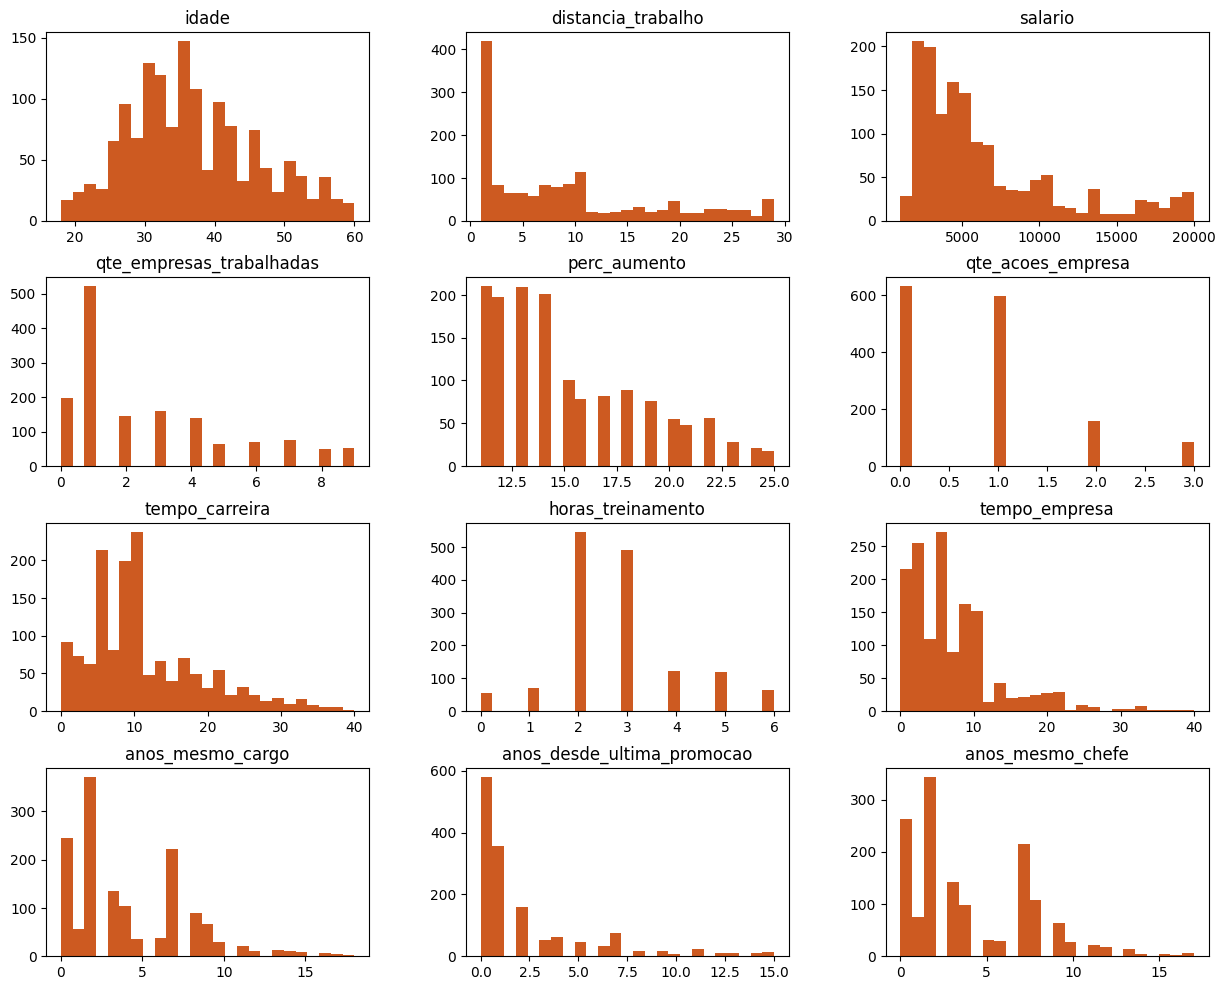

In [11]:
df.hist(figsize=(15, 12), color='#CD5A21', grid=False, bins=25)
plt.show()

 **4.1.2.2 - Boxplot das variáveis numéricas:**

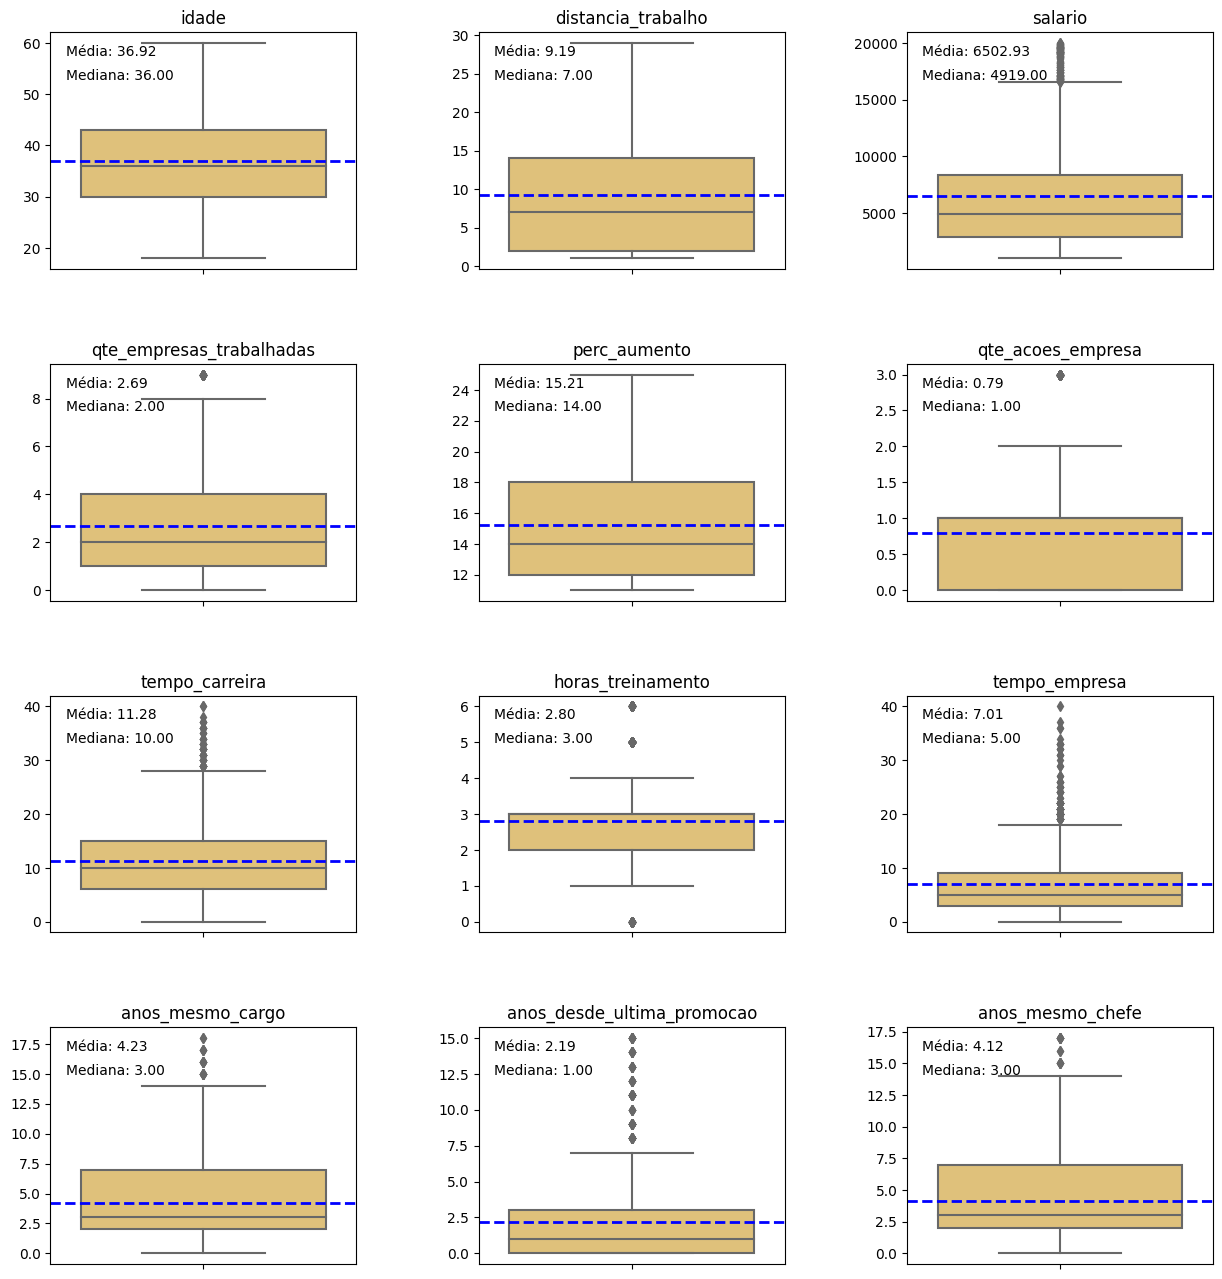

In [12]:
numerical_cols = ["idade", "distancia_trabalho", "salario", "qte_empresas_trabalhadas",
                  "perc_aumento", "qte_acoes_empresa", "tempo_carreira", "horas_treinamento",
                  "tempo_empresa", "anos_mesmo_cargo", "anos_desde_ultima_promocao", "anos_mesmo_chefe"]

# Calcula o número de linhas e colunas do grid
num_rows = (len(numerical_cols) + 2) // 3
num_cols = min(len(numerical_cols), 3)

# Criação do grid de subplots com tamanhos diferentes
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.4, hspace=0.4)

# Loop para criar cada boxplot em seu próprio subplot
for i, col in enumerate(numerical_cols):
    ax = plt.subplot(gs[i])
    sns.boxplot(data=df, y=col, color='#F0C76A', ax=ax)
    ax.set_title(f"{col}")
    ax.set_ylabel("")  # Remova o título do eixo y para evitar repetição

    # Obtendo a média e a mediana da coluna atual
    mean_value = df[col].mean()
    median_value = df[col].median()

    # Adicionando uma linha horizontal representando a média no boxplot
    ax.axhline(y=mean_value, color='blue', linestyle='dashed', linewidth=2)

    # Adicionando o valor da mediana no boxplot
    ax.text(0.05, 0.9, f'Média: {mean_value:.2f}', transform=ax.transAxes, fontsize=10)

    # Adicionando o valor da média no boxplot
    ax.text(0.05, 0.8, f'Mediana: {median_value:.2f}', transform=ax.transAxes, fontsize=10)

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.6)

# Mostrando o gráfico
plt.show()


**4.2 - Estatística Descritiva das Variáveis Qualitativas.**

**4.2.1 - Obtendo Insights das Variáveis Qualitativas:**

In [13]:
df.describe(include=['object'])

ID,funcionario_deixou_empresa,frequencia_viagens,formacao,esat,genero,estado_civil,faz_hora_extra,equilibrio_vida
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,5,4,2,3,2,4
top,Não,Raramente,Superior,Alto,Masculino,Casado,Não,Muito bom
freq,1233,1043,572,453,882,673,1054,893


**4.2.1.1 - deixou_empresa**<br>

- A maioria dos funcionários (1233) não deixou a empresa, representando cerca de 83,88% do total, enquanto 16,12% deixaram a empresa. Vale ressaltar que apesar de parecer um número relativamente baixo se comparardo aos funcionários que permaneceram na empresa, deve-se buscar junto ao RH, dados relativo aos anos anteriores para termos uma referência, e aí sim, poder-mos identificar se o valor é alto ou baixo. .
- A taxa de rotatividade da empresa parece ser relativamente baixa, pois a maioria dos funcionários permaneceu na empresa.

**4.2.1.2 - frequencia_viagens**<br>

- A coluna "frequencia_viagens" indica a frequência com que os funcionários viajam a trabalho.
- A maioria dos funcionários (1043) viaja "Raramente", representando aproximadamente 70,99% do total.
- A quantidade significativa de funcionários que viajam raramente pode indicar uma cultura de trabalho mais localizada ou uma necessidade limitada de viagens de negócios.


**4.2.1.3 - formacao**<br>

- A coluna "formacao" indica o nível de formação acadêmica dos funcionários.
- A maioria dos funcionários (572) possui formação "Superior", representando cerca de 38,78% do total.
- A presença de funcionários com níveis mais altos de formação pode indicar que a empresa valoriza a educação e busca profissionais mais qualificados.

**4.2.1.4 - esat**<br>

- A coluna "esat" indica o nível de satisfação dos funcionários com o ambiente de trabalho.
- A maioria dos funcionários (453) tem um nível de satisfação "Alto", representando aproximadamente 30,82% do total.
- O fato de que a maioria dos funcionários tem um alto nível de satisfação pode ser um indicativo positivo da cultura da empresa e do ambiente de trabalho.

**4.2.1.5 - genero**<br>

- A maioria dos funcionários (882) é do gênero "Masculino", representando aproximadamente 60% do total.
- A discrepância entre o número de funcionários masculinos e femininos pode ser relevante para questões de diversidade e inclusão na empresa? Será que é por se tratar de uma empresa de tecnologia?

**4.2.1.6 - estado_civil**<br>

- A maioria dos funcionários (673) é "Casado", representando aproximadamente 45,78% do total.
- O estado civil dos funcionários pode ter implicações nas políticas de benefícios e na gestão da equipe? 

**4.2.1.7 - faz_hora_extra**<br>

- A maioria dos funcionários (1054) não faz hora extra, representando aproximadamente 71,84% do total.
- A alta frequência de funcionários que não fazem hora extra pode indicar um equilíbrio saudável entre vida pessoal e profissional na empresa?

**4.2.1.8 - equilibrio_vida**<br>

- A maioria dos funcionários (893) tem um equilíbrio de vida "Muito bom", representando aproximadamente 60,82% do total.
- Um alto nível de equilíbrio entre vida pessoal e profissional pode contribuir para a satisfação e produtividade dos funcionários.

**4.2.2 - Visualização dos Dados Categóricos.**

**4.2.2.1 - Gráficos de barras para variáveis qualitativas:**

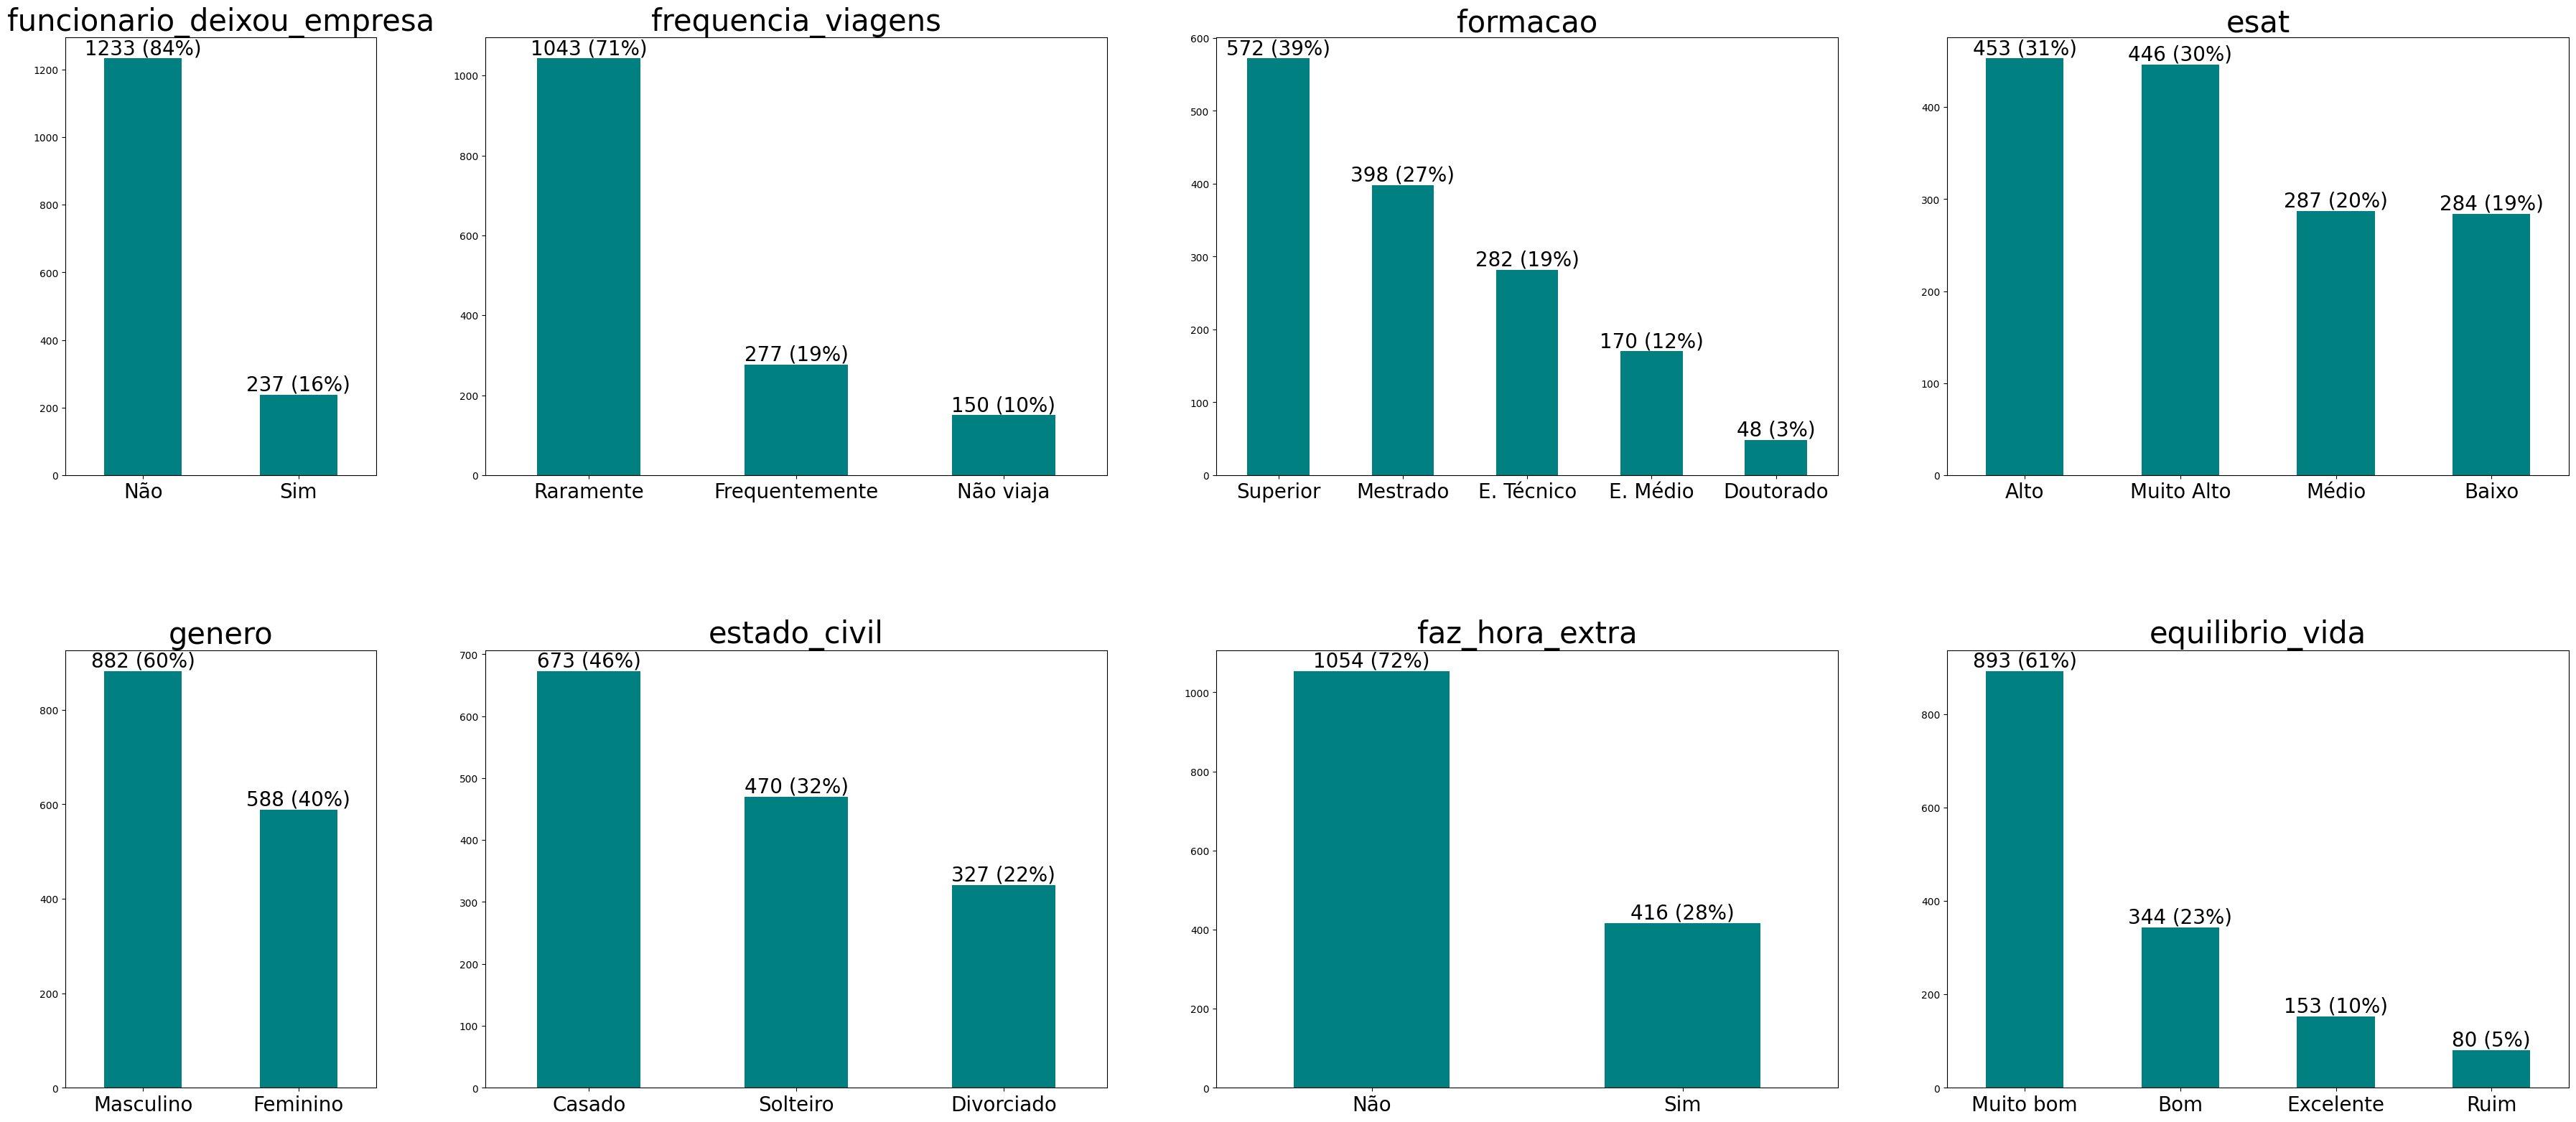

In [14]:
def calculate_percentage(dataframe, column):
    value_counts = dataframe[column].value_counts(0)
    total_records = len(dataframe)
    percentages = (value_counts * 100) / total_records
    return percentages

# Colunas categoricas
columns_cat = ['funcionario_deixou_empresa', 'frequencia_viagens', 'formacao', 'esat', 'genero', 'estado_civil', 'faz_hora_extra', 'equilibrio_vida']

# Criando grid de subplots com tamanhos diferentes
fig = plt.figure(figsize=(45, 19))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 2, 2, 2], wspace=0.2, hspace=0.4)

for i, col in enumerate(columns_cat):
    ax = plt.subplot(gs[i])
    counts = df[col].value_counts()
    percentages = calculate_percentage(df, col)  # Calcula as porcentagens
    
    counts.plot(kind='bar', color='Teal', ax=ax)
    ax.set_xlabel('')  
    ax.set_ylabel('')
    ax.set_title(f"{col}", fontsize=30)
    ax.tick_params(axis='x', labelrotation=0, labelsize=20)

    # Mostrando o valor dos rótulos com as porcentagens
    for index, value in enumerate(counts):
        percentage = percentages[counts.index[index]]
        ax.text(index, value, f"{value} ({percentage:.0f}%)", ha='center', va='bottom', fontsize=20)

plt.show()

**5 - DEFINIÇÃO E FÓRMULA DE CÁLCULO DO INFORMATION VALUE (IV).**

O Information Value é uma medida estatística que avalia a importância preditiva de uma variável em relação a uma variável de destino (target). É amplamente utilizado em análises de crédito, modelagem de risco e outras áreas onde a previsão é crucial.

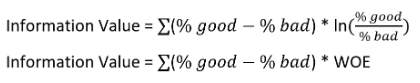

 **5.1 - CALCULANDO O IV DAS VARIÁVEIS**

In [15]:
def iv_woe(data, target, bins=10, show_woe=False):
    # Empty Dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()

    # Extaindo os nomes das colunas
    cols = data.columns

    # Executando o WOE e IV em todas as variáveis independentes
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars])) > 10):
            binned_x = pd.qcut(data[ivars], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events'] / d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(), 6)))
        temp = pd.DataFrame({"Variable": [ivars], "IV": [d['IV'].sum()]}, columns=["Variable", "IV"])
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)

        # Mostrando a tabela de WOE
        if show_woe:
            print(d)
    return newDF, woeDF
# Em função das mudanças durante o desenvolvimento, foi necessário confirmar a existência da variável funcionario_deixou_empresa. 
# Verificando se a coluna 'funcionário_deixou_empresa' existe no DataFrame 'df'
if 'funcionario_deixou_empresa' in df.columns:
    # Convertendo a coluna 'funcionário_deixou_empresa' para valores numéricos (0 ou 1)
    df['funcionario_deixou_empresa'] = df['funcionario_deixou_empresa'].map({'Não': 0, 'Sim': 1})
    iv, woe = iv_woe(data=df, target='funcionario_deixou_empresa')
else:
    print("A coluna 'funcionario_deixou_empresa' não existe no DataFrame 'df'.")


Information value of idade is 0.310653
Information value of frequencia_viagens is 0.120868
Information value of distancia_trabalho is 0.076491
Information value of formacao is 0.016505
Information value of esat is 0.099886
Information value of genero is 0.006496
Information value of estado_civil is 0.218898
Information value of salario is 0.419376
Information value of qte_empresas_trabalhadas is 0.130967
Information value of faz_hora_extra is 0.400183
Information value of perc_aumento is 0.044028
Information value of qte_acoes_empresa is 0.319083
Information value of tempo_carreira is 0.344795
Information value of horas_treinamento is 0.074164
Information value of equilibrio_vida is 0.066981
Information value of tempo_empresa is 0.347568
Information value of anos_mesmo_cargo is 0.266966
Information value of anos_desde_ultima_promocao is 0.016436
Information value of anos_mesmo_chefe is 0.264209


**5.1.1 - Transformando o resultado em Lista, para ser usado mais a frente.**

In [16]:
# Lista de tuplas com o nome da variável e o IV.
data = [
    ("idade", 0.310653),
    ("frequência_viagens", 0.120868),
    ("distancia_trabalho", 0.076491),
    ("formação", 0.016505),
    ("esat", 0.099886),
    ("genero", 0.006496),
    ("estado_civil", 0.218898),
    ("salario", 0.419376),
    ("qte_empresas_trabalhadas", 0.130967),
    ("faz_hora_extra", 0.400183),
    ("perc_aumento", 0.044028),
    ("qte_acoes_empresa", 0.319083),
    ("tempo_carreira", 0.344795),
    ("horas_treinamento", 0.074164),
    ("equilibrio_vida", 0.066981),
    ("tempo_empresa", 0.347568),
    ("anos_mesmo_cargo", 0.266966),
    ("anos_desde_ultima_promocao", 0.016436),
    ("anos_mesmo_chefe", 0.264209),
]

**OBS: Para constuir um gráfico de barras ordenando os respectivos resultados de IV, primeiramente utilizaremos como referência a tabela abaixo com os valores limites de IV e suas predições:**

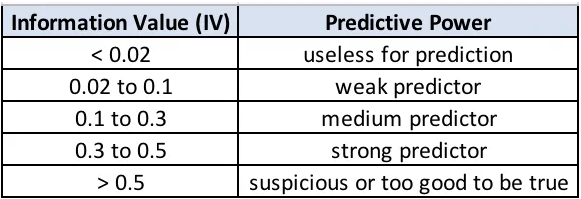


**Assim, poderemos ter uma melhor visão das variáveis que estão em cada faixa do IV.**

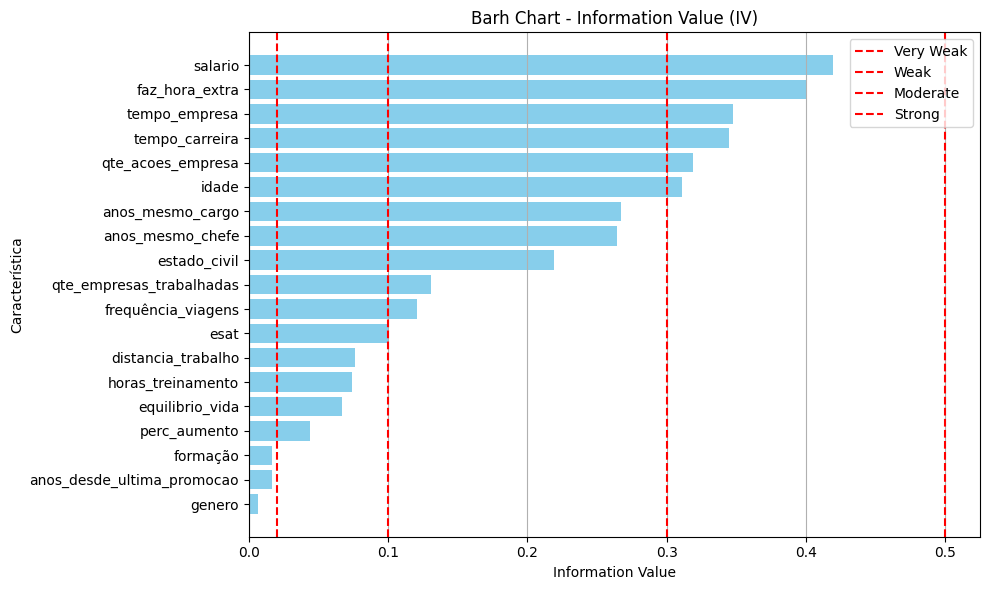

In [17]:
IV_LIMITS = {
    'Very Weak': 0.02,
    'Weak': 0.1,
    'Moderate': 0.3,
    'Strong': 0.5
}

# Ordenando a lista de tuplas pelo valor da informação em ordem decrescente
data_sorted = sorted(data, key=lambda x: x[1], reverse=False)

# Criando o dicionário automaticamente a partir da lista de tuplas ordenada
information_values = {feature: value for feature, value in data_sorted}

# Plot do histograma com as linhas verticais nos limites de IV
plt.figure(figsize=(10, 6))
plt.barh(list(information_values.keys()), list(information_values.values()), color='skyblue')
plt.xlabel('Information Value')
plt.ylabel('Característica')
plt.title('Barh Chart - Information Value (IV)')
plt.grid(axis='x')

# Adicionar as linhas verticais nos limites de IV
for iv_label, iv_value in IV_LIMITS.items():
    plt.axvline(iv_value, color='red', linestyle='--', label=iv_label)
    
plt.legend()  # Adicionar a legenda com as etiquetas dos limites de IV
plt.tight_layout()
plt.show()


**OBS. Com base nos dados do gráfico de barras acima, e tomando como referência os parâmetro do IV, serão priorizadas as 06(seis) primeiras variáveis, que possuem os seis maiores IVs, sendo elas:<br>
Prioridade 01 : salario;<br>
Prioridade 02 : faz_hora_extra;<br>
Prioridade 03 : tempo_empresa;<br> 
Prioridade 04 : tempo_carreira;<br>
Prioridade 05 : qte_acoes_empresa;<br>
Prioridade 06 : idade** 

**6 - Análise de funcionários que deixaram a empresa, baseado nas variáveis com os maiores IVs.**

**6.1 - Conferindo o dataframe para realizar as modificações abaixo.**

In [24]:
df.head()

ID,funcionario_deixou_empresa,idade,frequencia_viagens,distancia_trabalho,formacao,esat,genero,estado_civil,salario,qte_empresas_trabalhadas,faz_hora_extra,perc_aumento,qte_acoes_empresa,tempo_carreira,horas_treinamento,equilibrio_vida,tempo_empresa,anos_mesmo_cargo,anos_desde_ultima_promocao,anos_mesmo_chefe
1,Sim,41,Raramente,1,E. Técnico,Médio,Feminino,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
2,Não,49,Frequentemente,8,E. Médio,Alto,Masculino,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
3,Sim,37,Raramente,2,E. Técnico,Muito Alto,Masculino,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0
4,Não,33,Frequentemente,3,Mestrado,Muito Alto,Feminino,Casado,2909,1,Sim,11,0,8,3,Muito bom,8,7,3,0
5,Não,27,Raramente,2,E. Médio,Baixo,Masculino,Casado,3468,9,Não,12,1,6,3,Muito bom,2,2,2,2


**6.2 - Verificando os valores únicos na coluna "funcionario_deixo_empresa" antes da transformação.**

In [25]:
print(df["funcionario_deixou_empresa"].unique())

# Mapeando os valores "Sim" para 1 e "Não" para 0
df["funcionario_deixou_empresa"] = df["funcionario_deixou_empresa"].map({"Sim": 1, "Não": 0})

# Verificando os valores únicos na coluna "funcionario_deixo_empresa" após a transformação
print(df["funcionario_deixou_empresa"].unique())


['Sim' 'Não']
[1 0]


In [26]:
# Filtrando funcionários que deixaram a empresa
funcionario_deixou_empresa = df[df["funcionario_deixou_empresa"] == 1]

**6.3 - Estatísticas descritivas para funcionários que deixaram a empresa.**

In [27]:
funcionario_deixou_empresa.describe()

ID,funcionario_deixou_empresa,idade,distancia_trabalho,salario,qte_empresas_trabalhadas,perc_aumento,qte_acoes_empresa,tempo_carreira,horas_treinamento,tempo_empresa,anos_mesmo_cargo,anos_desde_ultima_promocao,anos_mesmo_chefe
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,33.607595,10.632911,4787.092827,2.940928,15.097046,0.527426,8.244726,2.624473,5.130802,2.902954,1.945148,2.852321
std,0.0,9.689350,8.452525,3640.210367,2.678519,3.770294,0.856361,7.169204,1.254784,5.949984,3.174827,3.153077,3.143349
min,1.0,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,28.000000,3.000000,2373.000000,1.000000,12.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.0,32.000000,9.000000,3202.000000,1.000000,14.000000,0.000000,7.000000,2.000000,3.000000,2.000000,1.000000,2.000000
75%,1.0,39.000000,17.000000,5916.000000,5.000000,17.000000,1.000000,10.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,1.0,58.000000,29.000000,19859.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,15.000000,14.000000


**7 - A partir da análise do IV, realizou-se uma lista de prioridades e para agrupar melhor os dados analisados, em conjunto com as conclusões que se chegou, teremos após cada gráfico, suas respectivas ações para responder as perguntas:<br>  O que fazer?;<br> Porque fazer?;<br>	Quem?;<br>	Como fazer?;<br> Qual o custo?**

**7.1 - Gráfico de Colunas da Distribuição de Faixa Salarial por Funcionários que deixaram a Empresa.**

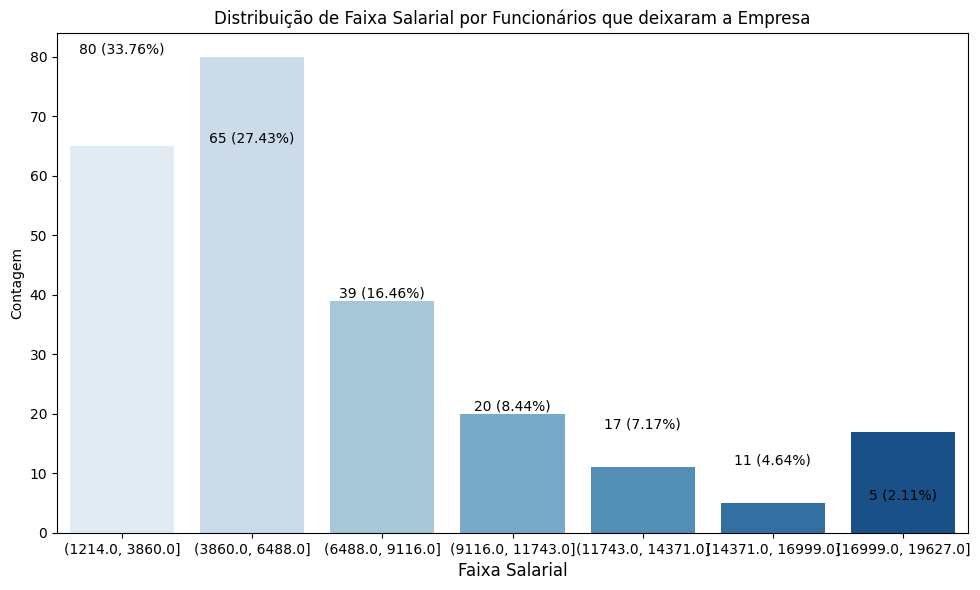

In [28]:
# Definir o número de faixas de salário que deseja criar
num_faixas = 7

# Filtrando o DataFrame para incluir somente 237 funcionários
total_funcionarios = 237
df_sample = df.sample(n=total_funcionarios, random_state=42)

# Criar as faixas de salário automaticamente usando a função pd.cut
df_sample['faixa_salario'] = pd.cut(df_sample['salario'], bins=num_faixas, precision=0)

# Calcular a contagem de cada faixa de salário
counts = df_sample['faixa_salario'].value_counts()

# Calcular o percentual de cada faixa em relação ao total de 237 funcionários
percentages = (counts * 100) / total_funcionarios

# Plotar o gráfico de contagem por faixa de salário com os percentuais
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_sample, x='faixa_salario', palette='Blues')
plt.title("Distribuição de Faixa Salarial por Funcionários que deixaram a Empresa", fontsize=12)
plt.xlabel('Faixa Salarial', fontsize=12)
plt.ylabel('Contagem', fontsize=10)

# Mostrando o valor dos rótulos com as porcentagens
for index, value in enumerate(counts):
    percentage = percentages[counts.index[index]]
    ax.text(index, value, f"{value} ({percentage:.2f}%)", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


**7.1.2 - Respondendo questões da Prioridade 1 (Salários):**

<font color="blue"><strong> 01 - Prioridade 1 - Salário

**2 - O que fazer?:**  Revisão da política salarial<br>
    
**3 - Porque fazer?** 
Nota-se que dos 237 funcionários que deixaram a empresa, 80 deles, cerca de 34%, ganhavam salários até o valor de R$ 3.860,00.<br> 

**4 - Quem?** Time responsavel pela política salarial (remunerações).<br>

**5 - Como fazer?** Além de criação de prêmios por atingimento de metas, criar conjuntamente uma política de retenção de talentos, principalmente entre as pessoas entre 18 e 25 anos, pois representam 47\% dos funcionários que deixaram a empresa.<br> 

**6 - Custo:** Encargos e benefícios          

**7.2 - Gráfico de Colunas da Distribuição de funcionário_faz_extra por Funcionários que deixaram a Empresa.**

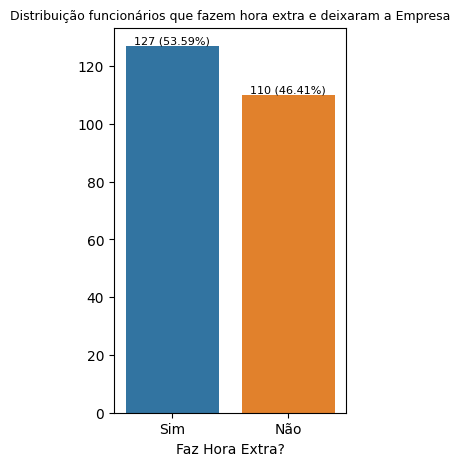

In [29]:
# Calcular a contagem de cada categoria
counts = funcionario_deixou_empresa['faz_hora_extra'].value_counts()

# Calcular o percentual de cada categoria em relação ao total de registros
percentages = (counts * 100) / len(funcionario_deixou_empresa)

# Gráficos para funcionários que deixaram a empresa
plt.figure(figsize=(3, 5))
ax = sns.countplot(data=funcionario_deixou_empresa, x="faz_hora_extra")
plt.title("Distribuição funcionários que fazem hora extra e deixaram a Empresa", fontsize=9)
plt.xlabel('Faz Hora Extra?')
plt.ylabel('')

# Mostrando o valor dos rótulos com as porcentagens
for index, value in enumerate(counts):
    percentage = percentages[counts.index[index]]
    ax.text(index, value, f"{value} ({percentage:.2f}%)", ha='center', va='bottom', fontsize=8)

plt.show()


**7.2.1 - Respondendo questões da Prioridade 2 (Faz Hora Extra):**

<font color="blue"><strong>1 - Prioridade 02 : Faz hora extra
    
**2 - O que fazer?:**  Revisão da(s) política(s) de horas extras<br>
    
**3 - Porque fazer?** 
Nota-se que dos 237 funcionários que deixaram a empresa, 127 deles, cerca de 54%, realizavam horas extras<br>
    
**4 - Quem?** Departamento de Recursos Humanos em conjunto com as chefias de cada setor.<br>
    
**5 - Como fazer?** Conversar com os colaboradores para identificar a causa das horas extras e desenvolver planos para diminuí-las, com maior divisão do trabalho, se for um acúmulo desses, ou aquisição de tecnologias para otimização do tempo.<br> 
    
**6 - Custo:** Para cada análise e setor poderá haver, custos diferenciados, como aumento na folha de pagamento, compra de novos equipamentos, ...           

**7.3 - Gráfico de Colunas da Distribuição de tempo_empresa por Funcionários que deixaram a Empresa.**

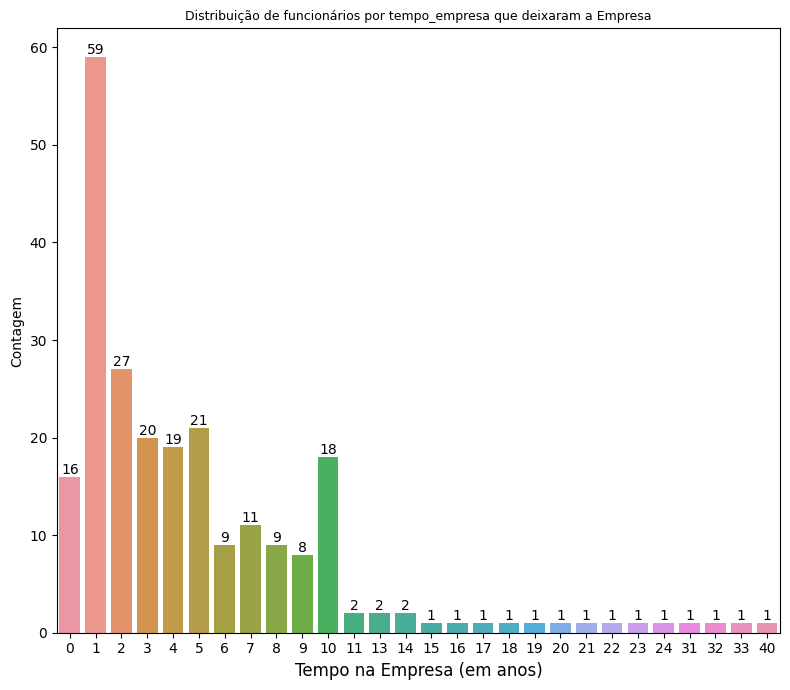

In [30]:
plt.figure(figsize=(8, 7))
ax = sns.countplot(data=funcionario_deixou_empresa, x="tempo_empresa")
plt.title("Distribuição de funcionários por tempo_empresa que deixaram a Empresa", fontsize=9)
plt.xlabel('Tempo na Empresa (em anos)', fontsize=12)
plt.ylabel('Contagem', fontsize=10)

# Obter as contagens de cada categoria
counts = funcionario_deixou_empresa["tempo_empresa"].value_counts()

# Ajustando a posição dos rótulos dentro das colunas
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()


**7.3.1 - Respondendo questões da Prioridade 3 (Tempo de Empresa):**

<font color="blue"><strong>1 - Prioridade 3 : Tempo de Empresa
    
**2 - O que fazer?:** Revisão na política de Cargos e Salários<br> 
    
**3 - Porque fazer?** Cerca de 50\% dos funcioinários que deixaram a empresa possuíam até 5 anos de empresa.<br> 
    
**4 - Quem?** Departamento de Recursos Humanos<br> 
    
**5 - Como fazer?** Desenvolvimento ou aprimoramento de uma políticade de Cargos e Salários, criando incentivos e dando maiores perspectivas de permanência na empresa.<br> 
    
**6 - Custo:** Contratação de consultoria para desenvolvimento do Plano de Cargos e Salários, caso não haja ou se queira aperfeiçoar o existente, capacitação e treinamento dos funcionários recem chegados na empresa.

**7.4 - Gráfico de Colunas da Distribuição de tempo_carreira por Funcionários que deixaram a Empresa.**

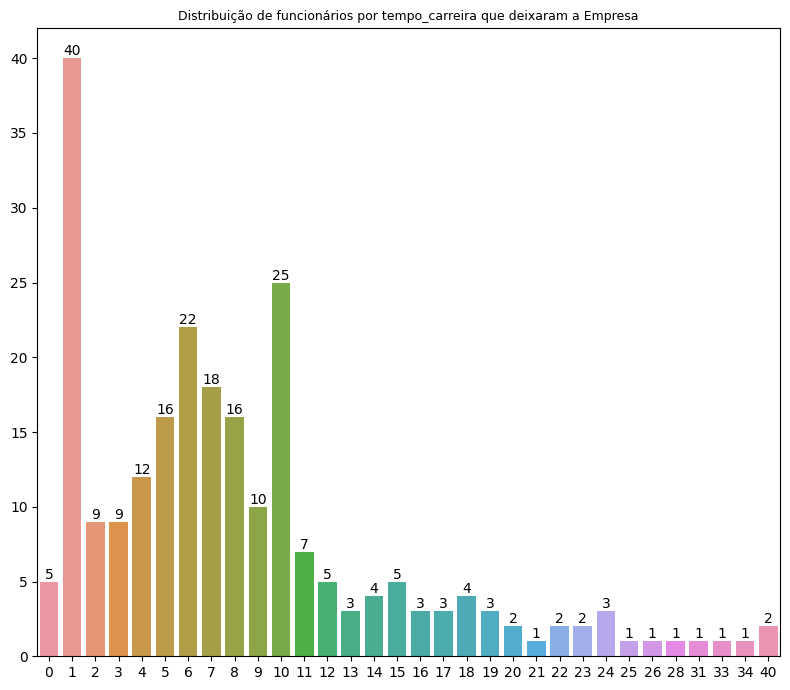

In [31]:
# Gráficos para funcionários que deixaram a empresa
plt.figure(figsize=(8, 7))
ax = sns.countplot(data=funcionario_deixou_empresa, x="tempo_carreira")
plt.title("Distribuição de funcionários por tempo_carreira que deixaram a Empresa", fontsize=9)
plt.xlabel('')  
plt.ylabel('')

# Obter as contagens de cada categoria
counts = funcionario_deixou_empresa["tempo_carreira"].value_counts()

# Ajustando a posição dos rótulos dentro das colunas
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

**7.4.1 - Respondendo questões da Prioridade 4 (Tempo de Carreira):**

<font color="blue"><strong>1 - Prioridade 4 : Tempo de Carreira
    
**2 - O que fazer?:** Analisar oportunidades de crescimento e desenvolvimento dentro da empresa, identificar problemas de comunicação e satisfação no trabalho.<br> 
    
**3 - Porque fazer?** Os funcionários com tempo de carreira médio (entre 1 a 5 anos) têm potencial para contribuir significativamente com a empresa, e mantê-los engajados é fundamental para a estabilidade e crescimento do negócio.<br>
    
**4 - Quem?** Gestores, equipe de Recursos Humanos.<br>
    
**5 - Como fazer?** Realizar avaliações de desempenho regulares, promover treinamentos e desenvolvimento profissional, oferecer oportunidades de progressão na carreira.<br> 
    
**6 - Custo:** Investimentos em treinamento e desenvolvimento podem ter custos, mas são geralmente menores do que os custos associados à rotatividade.

**7.5 - Gráfico de Colunas da Distribuição de qte_acoes_empresa por Funcionários que deixaram a Empresa.**

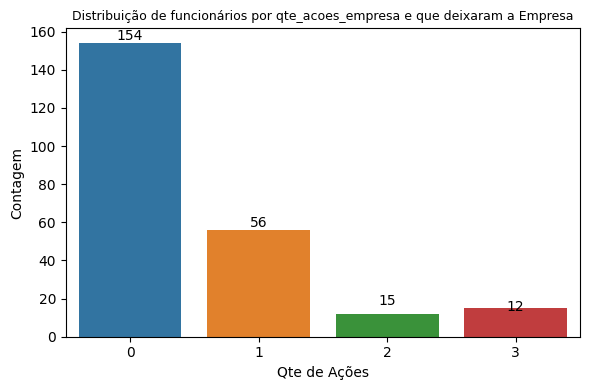

In [32]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=funcionario_deixou_empresa, x="qte_acoes_empresa")
plt.title("Distribuição de funcionários por qte_acoes_empresa e que deixaram a Empresa", fontsize=9)
plt.xlabel('Qte de Ações')  
plt.ylabel('Contagem')

# Obtendo as contagens de cada categoria
counts = funcionario_deixou_empresa["qte_acoes_empresa"].value_counts()

# Mostrando o valor dos rótulos com as contagens
for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**7.5.1 - Respondendo questões da Prioridade 5 (Quantidade de Ações da Empresa):**

<font color="blue"><strong>1 - Prioridade 5 : Qtde de Ações da Empresa
    
**2 - O que fazer?:**  Investigar a razão pela qual esses funcionários têm poucas ações na empresa. Pode ser que eles ainda não tenham alcançado um determinado nível de senioridade ou que a política de distribuição de ações não seja clara.<br>
    
**3 - Porque fazer?** Entender por que alguns funcionários possuem poucas ações é importante para garantir que o plano de participação nos lucros seja justo e motivador para todos os colaboradores.<br>
    
**4 - Quem?** Recursos Humanos, equipe de gestão e supervisores.
**5 - Como fazer?** Analisar os critérios para distribuição de ações, considerar possíveis ajustes nas políticas de participação nos lucros.<br> 
    
**6 - Custo:** O custo pode ser baixo, principalmente se a empresa optar por ajustar a distribuição de ações aos funcionários.

**7.6 - Gráfico de Colunas da Distribuição de idade por Funcionários que deixaram a Empresa.**

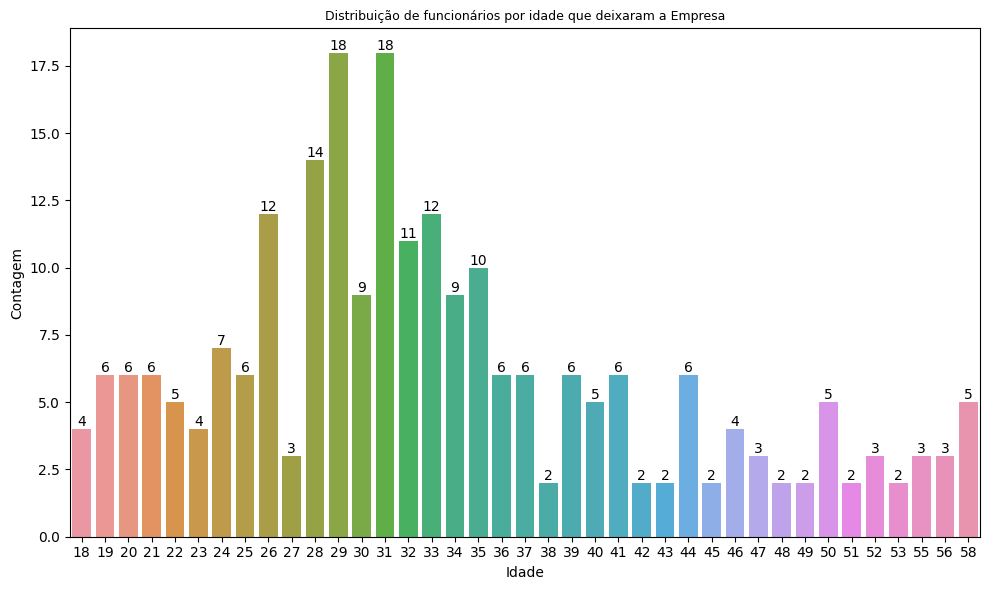

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=funcionario_deixou_empresa, x="idade")
plt.title("Distribuição de funcionários por idade que deixaram a Empresa", fontsize=9)
plt.xlabel('Idade')  
plt.ylabel('Contagem')

# Obtendo as contagens de cada categoria
counts = funcionario_deixou_empresa["idade"].value_counts()

# Ajustando a posição dos rótulos dentro das colunas
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<font color="blue"><strong>1 - Prioridade 6 : Idade
    
**2 - O que fazer?:**  Investigar os motivos pelos quais os funcionários na faixa entre 25 e 35 anos estão deixando a empresa. Pode ser que estejam buscando oportunidades de crescimento e desenvolvimento profissional.<br>
    
**3 - Porque fazer?** Compreender as razões da saída dos funcionários jovens é importante para criar um ambiente que incentive o desenvolvimento de carreira e a retenção de talentos.<br>
    
**4 - Quem?** Recursos Humanos, equipe de gestão e supervisores.<br>
    
**5 - Como fazer?** Realizar pesquisas de clima organizacional, oferecer programas de desenvolvimento e mentoria, proporcionar desafios profissionais que estimulem o crescimento.<br> 
    
**6 - Custo:** Investimento em programas de desenvolvimento pode ser necessário, mas é uma estratégia que pode gerar retorno a longo prazo.